In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
import pandas as pd

In [2]:
n = 1000
mean = 1

O = uniform.rvs(size = n, loc = - np.pi / 2, scale = np.pi)
U = uniform.rvs(size = n)
W = - mean * np.log(1 - U)

In [3]:
def plot(X, alpha):
    plt.figure(figsize = (5,2))
    plt.hist(X, bins = 15, label = "Generated r.v.")
    plt.title("Generated Stable Random Variables with alpha = %.2f" %alpha)
    plt.legend()
    plt.show()

In [38]:
def cdf(X, alpha):
    count, bins_count = np.histogram(X, bins = 15)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    
    plt.figure(figsize = (5,2))
    plt.title("CDF with alpha = %.2f" %alpha)
    plt.plot(bins_count[1:], pdf, label = 'PDF', alpha = 0.5)
    plt.plot(bins_count[1:], cdf, label = 'CDF', alpha = 0.5)
    plt.legend()
    plt.show()
    return pdf
    

# Symmetric

In [17]:
def stable_sym(O, W, alpha):
    if alpha == 1:
        Z = np.tan(O)
    else:
        Z = np.sin(alpha*O) / (np.cos(O))**(1/alpha) * ((np.cos((alpha - 1) * O)) / W)**((1-alpha)/alpha)
    return Z

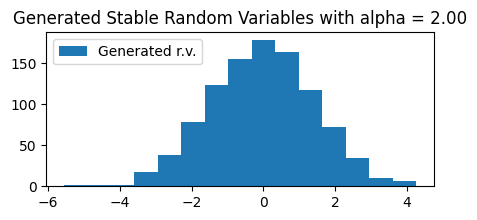

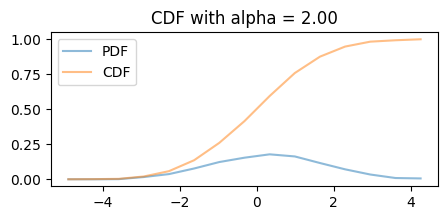

In [22]:
alpha = 2

Z = stable_sym(O, W, alpha)
plot(Z, alpha)
cdf(Z, alpha)

# Nonsymmetric

In [23]:
def stable_nonsym(O, W, alpha, beta):
    if alpha == 1:
        Z = 2 / np.pi * ((np.pi / 2 + beta * O) * np.tan(O) - beta * np.log(np.pi / 2 * W * np.cos(O) / (np.pi / 2 + beta * O)))
    else:
        O_0 = np.arctan(beta * np.tan(np.pi * alpha / 2)) / alpha
        Z = np.sin(alpha * (O_0 + O)) / (np.cos(alpha * O_0) * np.cos(O))**(1/alpha) * ((np.cos(alpha * O_0 + (alpha - 1) * O)) / W)**((1-alpha)/alpha)
    return Z

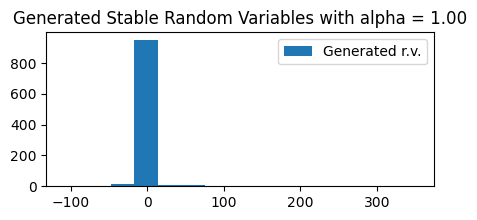

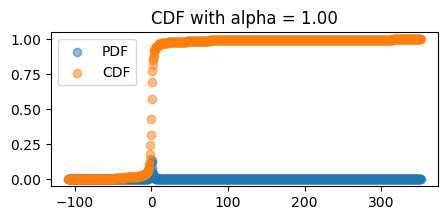

In [127]:
alpha = 1
beta = 0

Z = stable_nonsym(O, W, alpha, beta)
plot(Z, alpha)
F = cdf(Z, alpha)

In [119]:
def empirical_cdf(s: pd.Series, n_bins: int = 100):
    # Sort the data into `n_bins` evenly spaced bins:
    discretized = pd.cut(s, n_bins)
    # Count the number of datapoints in each bin:
    bin_counts = discretized.value_counts().sort_index().reset_index()
    # Calculate the locations of each bin as just the mean of the bin start and end:
    bin_counts["loc"] = (pd.IntervalIndex(bin_counts["index"]).left + pd.IntervalIndex(bin_counts["index"]).right) / 2
    # Compute the CDF with cumsum:
    return bin_counts.set_index("loc").iloc[:, -1].cumsum()

In [ ]:
cdf = empirical_cdf(Z, n_bins=100)
plt.figure(figsize = (4,2))
plt.scatter(cdf.index, cdf.values)
plt.show()

In [128]:
x = Z[Z>0]

#print(x)

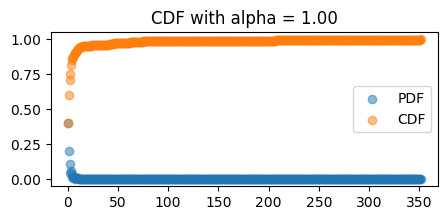

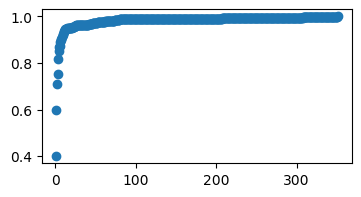

In [142]:
x_0, F = cdf(x, alpha)

plt.figure(figsize = (4,2))
plt.scatter(x_0, F)
plt.show()

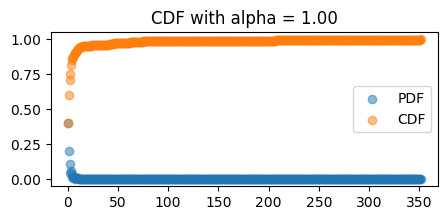

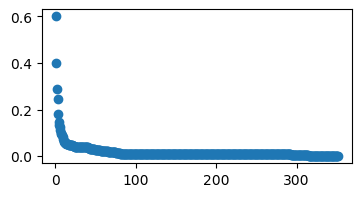

In [143]:
x_0, F = cdf(x, alpha)

plt.figure(figsize = (4,2))
plt.scatter(x_0, 1-F)
plt.show()

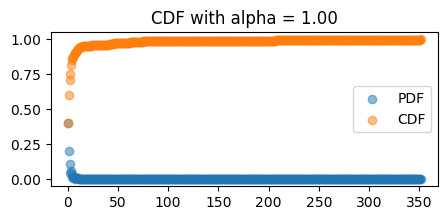

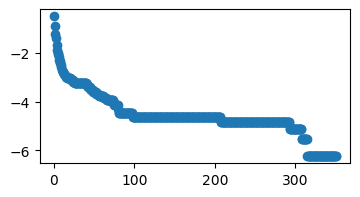

In [144]:
x_0, F = cdf(x, alpha)

plt.figure(figsize = (4,2))
plt.scatter(x_0, np.log(1-F))
plt.show()

In [ ]:
cdf = empirical_cdf(x, n_bins=100)
fig, ax = plt.subplots()
ax.scatter(cdf.index, cdf.values)

In [ ]:
cdf = empirical_cdf(x, n_bins=100)
fig, ax = plt.subplots()
ax.scatter(cdf.index, 1-cdf.values)

In [94]:
Z_ln = [np.log(x) if x > 0 else x for x in Z]
#Z_ln

[   1    1    1    1    1    1    1    1    1    1    1    1    1    1
    1    1    1    1    1    1    1    1    1    1    1    1    2    2
    3    3    3    3    3    3    3    3    3    3    3    4    4    4
    5    8    8   10   10   13   13   15   16   16   19   21   25   29
   32   40   51   63   70   85  104  130  149  184  220  262  313  362
  428  464  530  597  671  732  801  821  842  868  893  912  935  949
  954  960  970  976  979  982  985  988  991  992  994  996  997  998
  999 1000]
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0   -1   -1
   -2   -2   -2   -2   -2   -2   -2   -2   -2   -2   -2   -3   -3   -3
   -4   -7   -7   -9   -9  -12  -12  -14  -15  -15  -18  -20  -24  -28
  -31  -39  -50  -62  -69  -84 -103 -129 -148 -183 -219 -261 -312 -361
 -427 -463 -529 -596 -670 -731 -800 -820 -841 -867 -892 -911 -934 -948
 -953 -959 -969 -975 -978 -981 -984 -987 -990 -991 -993 -995 -996

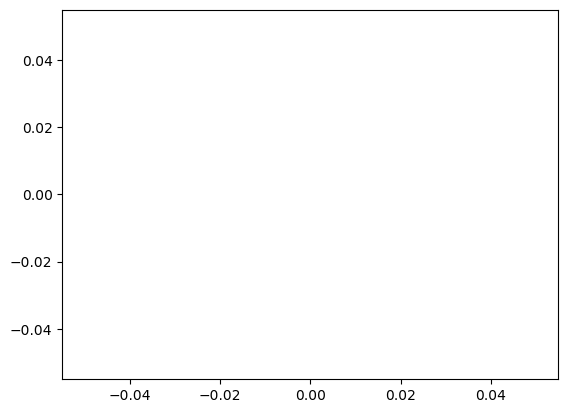

In [100]:
x = Z_ln

cdf = empirical_cdf(x, n_bins=100)

print(cdf.values)
print(1 - cdf.values)
print(np.log(1-cdf.values))
fig, ax = plt.subplots()
ax.scatter(cdf.index, np.log(1-cdf.values))

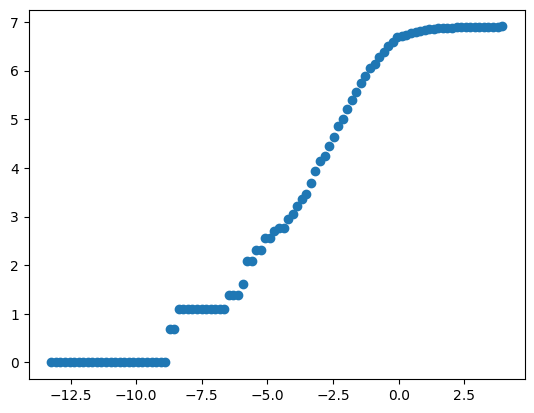

In [ ]:
cdf = empirical_cdf(x, n_bins=100)
fig, ax = plt.subplots()
ax.scatter(cdf.index, cdf.values)

In [ ]:
F = cdf(x, alpha)
y = 1 - F

#print(F)
#print(y)

In [ ]:
plt.figure(figsize = (5,2))
plt.plot(x, y, alpha = 0.5)
plt.show()

In [ ]:
F = cdf(Z_ln, alpha)

In [138]:
def cdf(X, alpha):
    count, bins_count = np.histogram(X, bins = len(X))
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    
    plt.figure(figsize = (5,2))
    plt.title("CDF with alpha = %.2f" %alpha)
    plt.scatter(bins_count[1:], pdf, label = 'PDF', alpha = 0.5)
    plt.scatter(bins_count[1:], cdf, label = 'CDF', alpha = 0.5)
    plt.legend()
    plt.show()
    return bins_count[1:], cdf

In [133]:
def cdf(X, alpha):
    count, bins_count = np.histogram(X, bins = len(X))
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    
    plt.figure(figsize = (5,2))
    plt.title("CDF with alpha = %.2f" %alpha)
    plt.plot(bins_count[1:], pdf, label = 'PDF', alpha = 0.5)
    plt.plot(bins_count[1:], cdf, label = 'CDF', alpha = 0.5)
    plt.legend()
    plt.show()
    return pdf

In [ ]:
#s = pd.Series(np.random.randn(10000)) -> Z
cdf = empirical_cdf(Z, n_bins=100)
fig, ax = plt.subplots()
ax.scatter(cdf.index, cdf.values)

In [ ]:
x = []
for i in Z:
    if(i > 0):
        x.append(np.log(i))
    else:
        x.append(i)

plt.hist(x)
